In [85]:
# import library
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [86]:
#Login access - Twitter AI Credencial 
consumerkey = 'consumerkey'
consumersecret = 'consumersecret'
accessToken = 'accessToken'
accessTokenSecret = 'accessTokenSecret'



In [87]:
# Create the authentication object
auth = tweepy.OAuthHandler(consumerkey,consumersecret)
#set the access token and access token secret
auth.set_access_token(accessToken, accessTokenSecret) 
# create the API object while passing in the auth-info
api = tweepy.API(auth, wait_on_rate_limit = True)

In [88]:
# Twitter user and language
name_id = 'BarackObama'
language = 'en'

In [89]:
# Extract X tweets from the twitter user
posts = api.user_timeline(screen_name=name_id,
                          count = 100,
                          lang =language,
                          tweet_mode="extended")

Unexpected parameter: lang


In [90]:
# print the last 5 tweets:
print("Show the 5 recent tweets: \n")
i = 0
for tweet in posts[0:5]:
    i = i + 1
    print(str(i) + ') ' + tweet.full_text + '\n')

Show the 5 recent tweets: 

1) And of course, I’m excited for my @WhiteSox to be back in the playoffs. It’s going to be hard to top a walk-off home run on the Field of Dreams, but if any team can do it, it’s this one. Go Sox! https://t.co/vymsDfGpCW

2) It’s always good to be from Chicago, but this year is especially sweet. Congratulations to the @ChicagoSky for making it to the WNBA finals, and to the legend, @Candace_Parker, for making all of us proud. We’ll be rooting for you. https://t.co/yW4d1OUYpF

3) If we don’t stand up for democracy, we’ll see this type of gerrymandering happen in even more states. It’s why @DemRedistrict is fighting for #FairMaps. And it’s why the Senate must pass the Freedom to Vote Act to protect our communities from partisan gerrymandering.

4) And in Georgia, Republicans released a congressional map that decreases the voting power of communities of color – including African Americans in a historically Black district – and ignores how the state has changed

In [91]:
#Create DF with column name Tweets
df_tweets=pd.DataFrame([tweet.full_text for tweet in posts], columns=['tweets'])

# show first 5 tweets od data.
df_tweets.head()

,tweets
0,"And of course, I’m excited for my @WhiteSox to be back in the playoffs. It’s going to be hard to top a walk-off home run on the Field of Dreams, but if any team can do it, it’s this one. Go Sox! https://t.co/vymsDfGpCW"
1,"It’s always good to be from Chicago, but this year is especially sweet. Congratulations to the @ChicagoSky for making it to the WNBA finals, and to the legend, @Candace_Parker, for making all of us proud. We’ll be rooting for you. https://t.co/yW4d1OUYpF"
2,"If we don’t stand up for democracy, we’ll see this type of gerrymandering happen in even more states. It’s why @DemRedistrict is fighting for #FairMaps. And it’s why the Senate must pass the Freedom to Vote Act to protect our communities from partisan gerrymandering."
3,"And in Georgia, Republicans released a congressional map that decreases the voting power of communities of color – including African Americans in a historically Black district – and ignores how the state has changed."
4,"In Texas, for example, Republicans recently passed a law making voting harder, especially for people of color. Now they’re advancing a new congressional map that’s tilted in their favor and doesn’t reflect the state’s growth. https://t.co/VRvoLXZsPq"


In [92]:
# clear the text
def cleantxt(text):
    text = re.sub(r'@[A-Za-z0–9]+', '', text) #removed @
    text = re.sub(r'#', '', text) # removed # symbol
    text = re.sub(r'RT[\s]+', '', text) # removed RT
    text = re.sub(r'https?:\/\/\S+', '', text) # removed hyperlink
    text = re.sub(r'&amp','', text)# removed  HTML 
    return text
df_tweets['tweets'] = df_tweets['tweets'].apply(cleantxt)

In [93]:
#show cleaned text
df_tweets

,tweets
0,"And of course, I’m excited for my to be back in the playoffs. It’s going to be hard to top a walk-off home run on the Field of Dreams, but if any team can do it, it’s this one. Go Sox!"
1,"It’s always good to be from Chicago, but this year is especially sweet. Congratulations to the for making it to the WNBA finals, and to the legend, _Parker, for making all of us proud. We’ll be rooting for you."
2,"If we don’t stand up for democracy, we’ll see this type of gerrymandering happen in even more states. It’s why is fighting for FairMaps. And it’s why the Senate must pass the Freedom to Vote Act to protect our communities from partisan gerrymandering."
3,"And in Georgia, Republicans released a congressional map that decreases the voting power of communities of color – including African Americans in a historically Black district – and ignores how the state has changed."
4,"In Texas, for example, Republicans recently passed a law making voting harder, especially for people of color. Now they’re advancing a new congressional map that’s tilted in their favor and doesn’t reflect the state’s growth."
5,"Right now, state legislatures across the country are setting new boundaries for state legislative and congressional districts. And in many states, Republicans are drawing maps that allow them to hold onto power."
6,"Our latest production from Higher Ground, Ada Twist, Scientist, is now on Netflix. Based on the book series, the show will continue the work we started at the White House Science Fair. We hope it inspires more young people to discover science and use their imagination to create."
7,"Happy anniversary, Miche! Over the past 29 years, I've loved watching the world get to know you not just as a daughter of the South Side, but as a mother, lawyer, executive, author, First Lady, and my best friend. I can’t imagine life without you."
8,"Happy 97th birthday, President Carter! Thank you for the extraordinary example of lifelong service that you've set for all of us."
9,"Today, we officially broke ground on the Obama Presidential Center on the South Side of Chicago. Michelle and I can’t imagine a better investment in the city we love, and generations of young leaders who will help create change."


In [94]:
# create a function to get the subjective
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
# Create a function to get the polarity
def getpolarity(text):
    return  TextBlob(text).sentiment.polarity

# Create column subjectivity and polarity
df_tweets['subjectivity'] = df_tweets['tweets'].apply(getsubjectivity)
df_tweets['polarity'] = df_tweets['tweets'].apply(getpolarity)

#shw DF[new columns: Subjectivity | Polarity]
df_tweets.tail()

,tweets,subjectivity,polarity
95,Spending time with young folks always makes me hopeful about the future. I had a great time catching up with South Shore students and talking about some of our plans for the Obama Presidential Center.,0.455000,0.280000
96,"This month marks 60 years since the Freedom Riders bravely set out on two buses to challenge segregation in the South.\n \nTo mark this anniversary, the spoke with three of those freedom riders. I hope you’ll listen to their story:",1.000000,0.800000
97,"The other day I had a chance to visit a COVID-19 vaccination site in Greenbelt, MD. It was great to see so many folks getting their shot. If you need one, sign up today at — and then spread the word so we can keep our families and communities safe.",0.531250,0.418750
98,"On International Nurses Day, let’s celebrate the nurses and medical professionals around the world who do so much for so many. And let’s thank them the best way we can: by getting the COVID-19 vaccine and encouraging our friends and family to do the same.",0.187500,0.283333
99,"When signed the American Rescue Plan, it led to the largest expansion of health care since the Affordable Care Act. Now close to 1 million people have signed up for health care since February. Make sure you're covered at",0.444444,0.250000


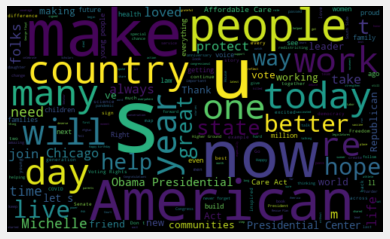

In [95]:
# Plot the Word Cloud
allwords = ' '.join( [twts for twts in df_tweets['tweets']] )
wordcloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size=119).generate(allwords)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [96]:
# create a function to compute negative|neutral|positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'Positive'
df_tweets['analysis'] = df_tweets['polarity'].apply(getAnalysis)

#show 5 first on DF
df_tweets.head()

,tweets,subjectivity,polarity,analysis
0,"And of course, I’m excited for my to be back in the playoffs. It’s going to be hard to top a walk-off home run on the Field of Dreams, but if any team can do it, it’s this one. Go Sox!",0.447917,0.177083,Positive
1,"It’s always good to be from Chicago, but this year is especially sweet. Congratulations to the for making it to the WNBA finals, and to the legend, _Parker, for making all of us proud. We’ll be rooting for you.",0.866667,0.733333,Positive
2,"If we don’t stand up for democracy, we’ll see this type of gerrymandering happen in even more states. It’s why is fighting for FairMaps. And it’s why the Senate must pass the Freedom to Vote Act to protect our communities from partisan gerrymandering.",0.500000,0.500000,Positive
3,"And in Georgia, Republicans released a congressional map that decreases the voting power of communities of color – including African Americans in a historically Black district – and ignores how the state has changed.",0.216667,-0.083333,Negative
4,"In Texas, for example, Republicans recently passed a law making voting harder, especially for people of color. Now they’re advancing a new congressional map that’s tilted in their favor and doesn’t reflect the state’s growth.",0.426136,0.009091,Positive


In [97]:
# Print all positive analysis
print('Printing positive tweets:\n')
j=0
sortedDF = df_tweets.sort_values(by=['polarity']) 
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['analysis'][i] == 'Positive'):
        j= j+1
        print(str(j) + ') '+ sortedDF['tweets'][i] + '\n')   
      

Printing positive tweets:

1) And of course, I’m excited for my  to be back in the playoffs. It’s going to be hard to top a walk-off home run on the Field of Dreams, but if any team can do it, it’s this one. Go Sox! 

2) It’s always good to be from Chicago, but this year is especially sweet. Congratulations to the  for making it to the WNBA finals, and to the legend, _Parker, for making all of us proud. We’ll be rooting for you. 

3) If we don’t stand up for democracy, we’ll see this type of gerrymandering happen in even more states. It’s why  is fighting for FairMaps. And it’s why the Senate must pass the Freedom to Vote Act to protect our communities from partisan gerrymandering.

4) In Texas, for example, Republicans recently passed a law making voting harder, especially for people of color. Now they’re advancing a new congressional map that’s tilted in their favor and doesn’t reflect the state’s growth. 

5) Right now, state legislatures across the country are setting new boundarie

In [98]:
# Print all positive analysis
print('Printing neutral tweets:\n')
j=0
sortedDF = df_tweets.sort_values(by=['polarity']) 
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['analysis'][i] == 'neutral'):
        j= j+1
        print(str(j) + ') '+ sortedDF['tweets'][i] + '\n')   

Printing neutral tweets:

1) : We never forget.

We never forget the children who have grown up without parents. Parents who have suffered without children. Hu…

2) California! You’ve got a big choice to make by September 14, and everything is on the line. Your vote could be the difference between protecting our kids or putting them at risk; helping Californians recover or taking us backwards. Vote “no” on the Republican recall.

3) This Labor Day, let’s honor all the working men and women who make this country what it is—and the American labor movement that has helped protect them, especially during this pandemic.

4) May God bless the memory of those we lost, and protect those who remain in harm’s way.

5) We’re at a turning point in the redistricting process, and maps drawn in the next 12 months will determine the next decade of representation in our country.  is empowering folks to demand accountability during redistricting—join them:  

6) : We can’t wait to tackle the climate cri

In [99]:
# Printando apenas os tweets negativos 
print('Printing negative tweets:\n')
j=0
sortedDF = df_tweets.sort_values(by=['polarity'],ascending=False)
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['analysis'][i] == 'Negative'):
        j=j+1
        print(str(j) + ') '+sortedDF['tweets'][i] + '\n')
        

Printing negative tweets:

1) And in Georgia, Republicans released a congressional map that decreases the voting power of communities of color – including African Americans in a historically Black district – and ignores how the state has changed.

2) As president, nothing was more painful than grieving with the loved ones of Americans who gave their lives serving our country. As President Biden said, these service members are heroes who have been engaged in a dangerous, selfless mission to save the lives of others.

3) Congress needs to summon the same courage we saw a half century ago when the Voting Rights Act was passed and guarantee every American a voice and a vote.

4) The Voting Rights Act, signed into law 56 years ago today, was a monumental piece of legislation. But with the Supreme Court and state legislatures making it harder to cast a ballot, we can’t take voting rights for granted.

5) Congratulations to the  team on their ! I could not be prouder of the disability rights 

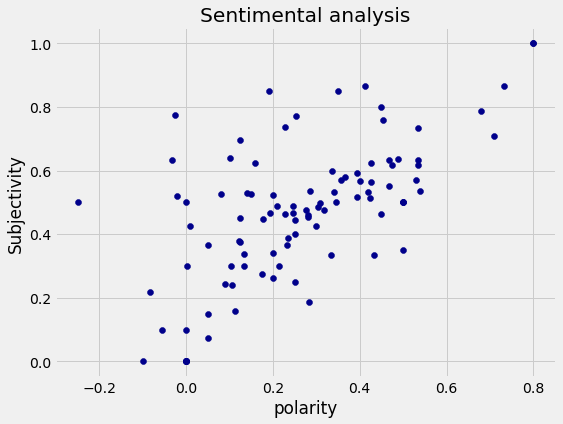

In [100]:
# Sentimental Analysis Plot Subjectivity | Polarity
plt.figure(figsize=(8,6)) 
for i in range(0, df_tweets.shape[0]):
    plt.scatter(df_tweets["polarity"][i], df_tweets["subjectivity"][i], color='darkblue') 
plt.title('Sentimental analysis') 
plt.xlabel('polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [101]:
# Percentage of positive tweets
ptweets = df_tweets[df_tweets.analysis == 'Positive']
ptweets = ptweets['tweets']
ptweets

round( (ptweets.shape[0] / df_tweets.shape[0]) * 100 , 1)

85.0

In [102]:
# Percentage of negative tweets
ntweets = df_tweets[df_tweets.analysis == 'Negative']
ntweets = ntweets['tweets']
ntweets

round( (ntweets.shape[0] / df_tweets.shape[0]) * 100, 1)

7.0

In [103]:
df = pd.DataFrame(df_tweets['analysis'].value_counts())

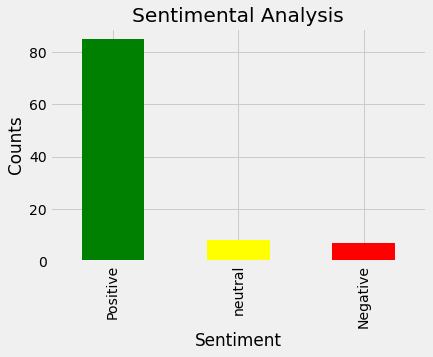

In [104]:
# show the value counts
df_tweets['analysis'].value_counts()

# plot and visualize the counts
plt.title('Sentimental Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_tweets['analysis'].value_counts().plot(kind='bar', color=['green', 'yellow','red'])
plt.show()